# **Entendimento do Problema**


**Aprendizado Supervisionado por Regressão ou Classificação ?**


O nosso problema trata-se de um problema mais básico de classificação, que envolve duas classes, que podemos chamar de classe positiva e classe negativa (o que significa ser positivo ou negativo depende da semântica do problema).

E esse tipo de tarefa é chamada de classificação binária. Por exemplo, temos a tarefa de classificar nossos dados em duas classes: maligno ou benigno. Nesse cenário, como estamos interessados em encontrar as chances de paciente ter câncer de mama , pode ser interessante considerar a classe "M" como sendo resultados dos diagnósticos como maligno, enquanto a classe de "B" é considerada benigno, ou seja, o paciente não tem o câncer.


Para um classificador binário, que no caso envolve o nosso problema, podemos construir uma matriz de confusão, que sumariza os acertos e erros de um classificador. Mas isso veremos mais na frente na avaliação do nosso modelo.

Além disso, extremamente importante realizar a interpretação do modelo que elegemos mais eficaz para o problema, tal informação é importante para compreender o que o modelo de machine learning está considerando para classificar que determinado diagnóstico é maligno ou benigno.

# **Coleta dos dados**


Os dados foram coletados a partir da plataforma Kaggle, que trata-se de uma comunidade de Data Science e Machine Learning, onde além de ser realizada competições da área, é possivel encontrar dados e projetos de outros usuários.



Este conjunto de dados adquiridos na plataforma é referente ao conjunto de dados de [câncer de mama Wisconsin](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)


**Contexto dos Dados**

Para cada característica de valor real foi calculado o mean (média), standard error (erro padrão), e o worst (pior) or largest (maior). Por fim a média desses três recursos foram calculados para cada imagem,
resultando em 30 recursos desse grupo de dez características.

Todos os valores de recursos são recodificados com quatro dígitos significativos.

Quanto a valores de atributo ausentes não teve nenhum.
Distribuição dos diagnósticos: 357 benignos, 212 malignos

**Dicionário de Variáveis**


* ID number - Número de identificação
* Diagnosis - Diagnóstico (M = maligno, B = benigno)

Dez características de valor real são computadas para cada núcleo de célula:

* radius - Média das distâncias do centro aos pontos do perímetro
* texture - Desvio padrão dos valores de escala de cinza
* perimeter - Perímetro
* area - Área
* smoothness - Suavidade (variação local nos comprimentos dos raios)
* compactness - Compacidade (perímetro^2 / área - 1,0)
* concavity - Concavidade (gravidade das porções côncavas do contorno)
* concave - Número de porções côncavas do contorno
* symmetry - Simetria
* fractal dimension - Dimensão fractal ("aproximação do litoral" - 1)



# Configurações iniciais

Para iniciar o projeto, precisamos primeiro importar as bibliotecas e algumas delas são essenciais, como a biblioteca Pandas, uma das principais, tendo em vista a necessidade de manipular e analisar os dados.



In [3]:
# importando biblioteca
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Abrindo o arquivo no formato CSV, os dados estão separados por "," e possue 569 linhas, ou seja, se trata de um conjunto de dados de tamanho pequeno, comparado ao mundo real.

In [4]:
#carregando bases
data = pd.read_csv('data.csv' )

As primeiras 5 entradas do conjunto de dados já permitem adquirirmos uma noção inicial sobre o tipo de formato, exemplos de entrada e formulação das hipóteses iniciais do processo investigativo.



In [5]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


Como antes mesmo de importar o conjunto de dados, foi feita uma leitura, eu sei que o conjunto de dados possue 569 linhas, porém, será que a leitura dos dados de forma manual, foi realizada corretamente? Então, para um primeiro entendimento dos dados, vamos descobrir quantas linhas e colunas o conjunto de dados possue.

In [7]:
#Numero de linhas e colunas
print(f'Número de linhas ou variaveis {data.shape[0]}')
print(f'Número de entradas ou colunas {data.shape[1]}')

Número de linhas ou variaveis 569
Número de entradas ou colunas 33


A leitura dos dados foi feita de maneira correta e agora sabemos que o conjunto de dados possue 569 linhas e 33 entradas. Por mais que pareça algo simples e insignificante, essas informações dão uma noção e entendimento importante para as próximas etapas, como a etapa de deletar colunas ou dados que não serão usados na análise.



# Preparação dos dados


Compreendemos que o processo de preparação dos dados é onde se concentra 80% do trabalho, pois é nesse momento que temos que descobrir problemas na base de dados, como: dados ausentes, tipo de dados de colunas incorretos, duplicidade de informação, campos de dados sem normalização padronizada, outliers e dentre outras verificações que podem sugir com o andamento do projeto.

Todavia, independente da base que estamos utilizando é necessário se fazer a seguintes perguntas: como esses dados chegaram até mim? Os dados refletem a realidade?

Além da aplicação de técnicas de preparação de dados que aprendemos em cursos, essas questões levantadas devem ser feitas e ser investigado como foi construção dos dados.

No presente projeto teve-se essa preocupação de investigação dos dados, e assim foi realizado. No fim foi visto que de fato os dados da base trabalhada nesse projeto é fidedigna a realidade.


#### **Verificação da padronização do datafrane**

Como a base de dados possui apenas uma coluna que tem valores caractere foi necessário verificar se existia inconsistência de padronização dos mesmo, e a mesma é referente ao diagnóstico.

In [8]:
## verificando campo com nomes dos times
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

É possível perceber que a coluna está padronizada, pois existe apenas 'M' (maligno) e 'B' (benigno). Logo, não haverá necessidade de fazer modificações na mesma.

Caso estivessemos em cenário de precisar padronizar essa coluna de diagnóstico, quais atividades deveriamos excutar para garantir que nossa coluna estaria de qualidade, com dados limpos?

Inicialmente começariamos  colocando tudo para minusculo utilizando a seguinte linha de código:
**data.diagnosis = data.diagnosis.str.lower()**

Em seguida seria interessante vê novamente os valores únicos da coluna utilizando o seguinte recurso:
**data.diagnosis.unique()**

Já verificado os valores únicos da coluna, se percebemos que existe uma quantidade considerável de dados com pontuação, temos que remover essas pontuações para garantir a padronização. Aetirando qualquer pontuação seria feita por:
**data.diagnosis = data.diagnosis.replace("[^\w\s]"," ",regex=True)**

Novamente é interessante verificar como ficou nossos dados depois de ter retirado toda a pontuação existente nos mesmos:
**data.diagnosis.unique()**

Caso a gente verifique que ficou espaços em brancos duplicados depois que foi removido a pontuação, não se aperreie que é excutar a seguinte linha de código para ser removido dos os espaços em branco duplicados:
**data.diagnosis = data.diagnosis.replace("\\s+"," ",regex=True)**

Não é o nosso caso aqui nesse projeto, mas é pertinente ressaltar que dependendo do valores caracteres informacional da coluna podemos adotar uma outra abordagem.

Digamos que tivesse uma coluna nesse dataframe referente aos comentários dos pacientes com relação a consulta realizada, e quisemos repassar para a gestão negocial uma análise sentimetal dos mesmos.

Como que a gente faz isso?
É possível?

É possível sim, e fazemos isso com Linguagem Natural.
Sendo selecionado a coluna dos comentários, colocar tudo na coluna em minúsculo, remover pontuação, remover stopwords (palavras sem valor/irrelevantes), remover caracteres especiais (emojis, acentuações e etc), transformar o texto em uma estrutura númerica que pode ser uma bag of words (matriz de palavras com frequência absoluta) sendo recurso que indica quantas vezes aquela palavra apareceu e exibir o resultados em um wordcloud que é aquela visualização em que o tamanho da palavra evidencia a frequencia da mesma.


Novamente reitero que não será feito esse processo para nosso caso de estudo, nesse parágrafo é apenas entregue uma abordagem interessante de trabalho em colunas que carregam valor sentimental do cliente.

#### **Verificação de dados duplicados**

Tarefa importante na etapa de limpeza e preparação de dados é a correção de dados duplicados, por mais que, possivelmente, esse conjunto de dados não possua dados duplicados, por o conjunto de dados já está um pouco limpo, é comum encontrar em alguns conjuntos de dados. Os valores duplicados na maioria dos conjuntos de dados são encontrados com frequência e dependendo da análise que será feita, esses valores podem alterar o resultado final.



In [9]:
data.duplicated().sum()

0

O dataset não possui dados duplicados como mencionado anteriormente, porém, caso fosse identificado a presença de dados duplicados, seria necessário remover todos os valores repetidos, fazendo o uso do método drop_duplicates() ou uma outra técnica.



#### **Outliers**

<p align="center"><img src="https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png
", width="50%"></p>


Os outliers, são os famosos "pontos fora da curva" ou observações que não parecem seguir o mesmo padrão dos demais dados. Normalmente apresentando distribuições diferentes. Identificar e tratar os outliers é de suma importância, devido que os outliers influenciam diretamente nas análises e nos algoritmos, ao apresentar comportamento distoante do resto do data set.

Impactando tanto na média e variância, como nas funções de perda e custo.

Após os outliers terem sido identificados, sua remoção ou transformação só deve ser feita se realmente fizer sentido, logo, deve ser levado em consideração que alguns outliers são dados autenticos e devem ser estudados com atenção, para saber se de fato deve ser feita sua remoção


Podemos identificar um outlier de diversas formas, entre elas podemos citar:

* IQR Score
* Boxplots
* Scatter plots
* Z-Score

Vamos ver na prática o processo completo de limpeza de dados, tratando dados ausentes, convertendo os dados para o formato correto, e tratando dos outliers.


Vamos utilizar o método describe, agora mais focado em tentar identificar se existem dados discrepantes no conjunto de dados. Então, ao analisar o resultado estatistico fornecido pelo método describe, precisamos observar o quão os valores, por exemplo, valor min e o valor máximo estão distantes (discrepantes).

In [10]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


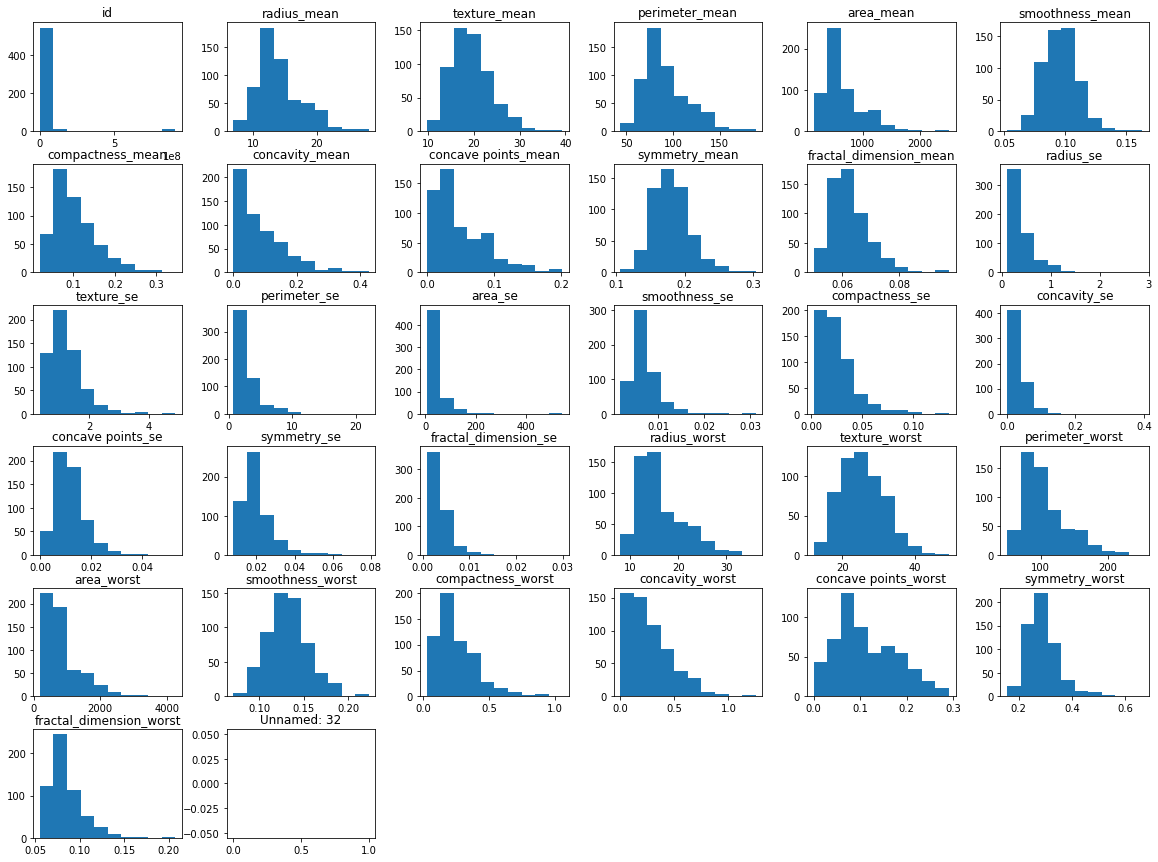

In [11]:
# verificando as distribuições
data.hist(figsize=(20,15), grid=False);

**Há outliers?**

Pela distribuição do histograma, é possível verificar indícios da presençã de *outliers*. Olhe por exemplo as variáveis `area_mean` e `concavity_mean`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar a suspeita, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`

* Plotar `boxplots` para a variável.

Em relação a plotagem de **boxplots** referentes as **variáveis suspeitas** foi adotado a estratégia conhecida como **IQR Scores** para definir os **limites superiores e inferiores** de cada variável suspeita, com a finalidade de usar os limites para **definir o corte e remover os outliers**.

Assim sendo foi definido para as variáveis `area_mean` e `concavity_mean`: **quartile 1 (Q1) que é o 25%**, **o quartile 3 (Q3) que é o 75%** e o resultado da **IQR**.

Depois de realizar o **IQR Scores** nas duas variáveis foram adquiridas as seguintes informações:




**Identificando outliers para variável area_mean**


In [12]:
# definindo quartile 1 (Q1) que é o 25%, definindo quartile 3 (Q3) que é o 75% e obtendo por fim o resultado da IQR
q1_area_mean = data.area_mean.quantile(.25)
q3_area_mean = data.area_mean.quantile(.75)
iqr_area_mean = q3_area_mean - q1_area_mean
print ("O IQR da área media é: ", iqr_area_mean)

# definindo os limites superior e inferior da variável
sup_area_mean = q3_area_mean + 1.5 * iqr_area_mean
inf_area_mean = q1_area_mean - 1.5 * iqr_area_mean

print ("O limite superior é: ", sup_area_mean)
print ("O limite inferior é: ", inf_area_mean)

O IQR da área media é:  362.40000000000003
O limite superior é:  1326.3000000000002
O limite inferior é:  -123.30000000000001


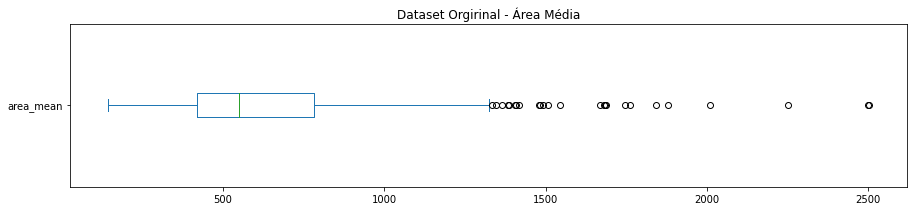

 O dataset possui 569 entradas
 25 Entradas acima de 1326.3
 Representam 4.39% do dataset


In [13]:
# verificando conjunto original
fig, ax = plt.subplots(figsize=(15,3))
data.area_mean.plot(kind="box", vert=False)
ax.set_title('Dataset Orgirinal - Área Média')
plt.show()
print(" O dataset possui {} entradas".format(data.shape[0]))
print(" {} Entradas acima de 1326.3".format(len(data[data.area_mean > 1326.3])))
print(" Representam {:.2f}% do dataset".format((len(data[data.area_mean > 1326.3]) / data.shape[0])*100))

**Identificando outliers para variável concavity_mean**


In [14]:
# definindo quartile 1 (Q1) que é o 25%, definindo quartile 3 (Q3) que é o 75% e obtendo por fim o resultado da IQR
q1_concavity_mean = data.concavity_mean.quantile(.25)
q3_concavity_mean = data.concavity_mean.quantile(.75)
iqr_concavity_mean = q3_concavity_mean - q1_concavity_mean
print ("O IQR da área media é: ", iqr_concavity_mean)

# definindo os limites superior e inferior da variável
sup_concavity_mean = q3_concavity_mean + 1.5 * iqr_concavity_mean
inf_concavity_mean = q1_concavity_mean - 1.5 * iqr_concavity_mean

print ("O limite superior é: ", sup_concavity_mean)
print ("O limite inferior é: ", inf_concavity_mean)

O IQR da área media é:  0.10114000000000001
O limite superior é:  0.28241000000000005
O limite inferior é:  -0.12215000000000001


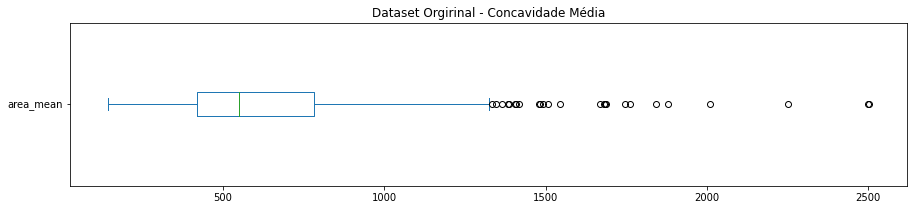

 O dataset possui 569 entradas
 18 Entradas acima de 0.28241
 Representam 3.16% do dataset


In [15]:
# verificando conjunto original
fig, ax = plt.subplots(figsize=(15,3))
data.area_mean.plot(kind="box", vert=False)
ax.set_title('Dataset Orgirinal - Concavidade Média')
plt.show()
print(" O dataset possui {} entradas".format(data.shape[0]))
print(" {} Entradas acima de 0.28241".format(len(data[data.concavity_mean > 0.28241])))
print(" Representam {:.2f}% do dataset".format((len(data[data.concavity_mean > 0.28241]) / data.shape[0])*100))

**Resultados Obtidos**

* `area_mean`
<p> O dataset possui 569 entradas</p>
<p>  25 Entradas acima de 1326.3</p>
<p>  Representam 4.39% do dataset</p>



* `concavity_mean`
<p> O dataset possui 569 entradas</p>
<p>  18 Entradas acima de 0.28241</p>
<p>  Representam 3.16% do dataset</p>



**Remoção de Outliers**

A remoção dos Outliers só deve acontecer se realmente fizer sentido, e analisando as análises efetuadas foi identificado que não é necessário a remoção desses dados discrepantes. Eles estão em porcentagem em que é considerável para trabalhar com os dados

#### **Verificação dos valores ausentes**

Os dados ausentes em sua maioria podem ocorrer devido a não-resposta, ou seja, nenhuma informação foi registrada para uma variável, sendo mais um dos problemas de sujeira que pode aparecer em um dataset, os dados ausentes precisam ser limpados e tratados, de modo que deixem de ser dados ausentes e passem a ganhar significado. Dessa forma, antes de limpar e tratar os dados ausentes, primeiro é preciso identificar se existe a presença de dados ausentes ou faltantes no conjunto de dados.

Para identificar a presença de dados ausentes, eu poderia ter usado o método isnull(), porém para sempre manter as boas práticas ao utilizar a biblioteca pandas, é interessante utilizar o método isna(), devido que o final "na" do método remete ao dropna e fillna, que são metodos que também trabalham de alguma forma com dados ausentes.

In [16]:
# ver a quantidade de valores ausentes
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [17]:
# ver a porcentagem de valores ausentes 
data.isnull().sum() / data.shape[0]

id                         0.0
diagnosis                  0.0
radius_mean                0.0
texture_mean               0.0
perimeter_mean             0.0
area_mean                  0.0
smoothness_mean            0.0
compactness_mean           0.0
concavity_mean             0.0
concave points_mean        0.0
symmetry_mean              0.0
fractal_dimension_mean     0.0
radius_se                  0.0
texture_se                 0.0
perimeter_se               0.0
area_se                    0.0
smoothness_se              0.0
compactness_se             0.0
concavity_se               0.0
concave points_se          0.0
symmetry_se                0.0
fractal_dimension_se       0.0
radius_worst               0.0
texture_worst              0.0
perimeter_worst            0.0
area_worst                 0.0
smoothness_worst           0.0
compactness_worst          0.0
concavity_worst            0.0
concave points_worst       0.0
symmetry_worst             0.0
fractal_dimension_worst    0.0
Unnamed:

Como já é de costume em todo projeto de Data Science, a verificação da presença de valores ausentes no dataset é de extrema importância, principalmente em projetos que envolvem Machine Learning, pois o output é o reflexo direto do input.

Diante disso é visto a quantidade de valores ausentes na perspectiva quantitativa e percentual.
E após analisar as duas é evidenciado que não há a presença de valores ausentes.

#### **Verificação dos valores númericos**

Para cada coluna presente no dataframe. É importante verificar de maneira minuciosa se o tipo de dados de fato faz sentindo para a coluna. 

Com exceção da coluna diagnosis e id, todas as outras são do tipo numérica (float). E não é considerado que os tipos de dados estão incorretos, a configuração atual é correta.

In [18]:
## corrigindo campos numéricos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

A limpeza e manipulação dos dados nesse projeto pode parecer algo muito simples e que inicialmente não tem significado, porém, nos casos reais os dados dificilmente virão tratados, limpos e organizados. Por isso, tanto se fala que essa etapa é a etapa que mais se demanda tempo. Sendo a responsável por fazer uma amostra limpa dos dados, para que assim os dados possam ser utilizados em etapas futuras, como na análise exploratória dos dados, onde os dados precisam estar limpos e organizados para ganharem significados.

# Features para o modelo


<p>Na fase de entendimento do problema foi entendido que o dataframe possuí dez características de valor real são computadas para cada núcleo de célula </p> 
<p> Para cada característica de valor real foi calculado o mean (média), standard error (erro padrão), e o worst (pior) or largest (maior). Resultando em 30 recursos desse grupo de dez características.</p> 

<p> Diante disso é decidido ser selecionado apenas as dez entradas de dados que possuí o valor médio, compreende-se que as mesmas armazenam informação necessária para ajudar o modelo de machine learning na classificação de câncer de mama.</p> 








In [19]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


<p> Desse modo é realizado a filtragem de entradas que possui a informação que indica que os mesmos são a média, e o resultado obtido é armazenado em features. </p> 

In [20]:
features = data.filter(regex=r"_mean", axis=1)
features.tail()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884


<p> É aproveitado a oportunidade para converter a coluna referente a diagnóstico que possuí os dados: "M" e "B" </p> 

<p> "M" é maligno sendo decidido colocar o valor 0 para substituir esse atual valor </p>

<p> "B" é benigno sendo decidido colocar o valor 1 para substituir esse atual valor </p>

In [21]:
y = data['diagnosis'].map({"M":0, "B": 1})

In [22]:
y.value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

<p>Percebemos que no nosso dataframe existe 212 diagnósticos que informaram que o usuário possuia câncer de mama.</p>

<p>Já existem 357 diagnósticos que informava que o cliente não tem câncer de mama, sendo benigno o que significa que apenas não são considerados cancerígenos, sendo células com aparência próxima do normal, crescendo lentamente e não invadem os tecidos vizinhos, nem se espalham para outras partes do corpo.</p>

# Salvando modificações


Após realizar todas as ações efetuadas é decidido concatenar as features e a variável alvo que é o diagnóstico.

E essa conecção é guardada em uma variável que agora é nossa nova versão do dataframe.

In [23]:
data_version1 = pd.concat([features, y], axis=1)

<p>Depois da junção é realizado o salvamento de tudo em arquivo. É uma metodologia interessante de ser adotada para evitar refazer todo o trabalho anterior, com o salvamento na próxima fase do projeto não iremos mais vem aqui realizar novamente todas as ações. </p>
<p> Vamos na próxima fase que é referente a exploração de dados, fazer o uso desse arquivo que já tem dados que passou pela fase de coleta e preparação de dados para realizar algumas visualizações primordiais para tomar decisões importante para garantir que teremos sucesso no nosso projeto de machine learning</p> 

In [24]:
data_version1.to_csv("data_version1.csv",index=False)